Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
data=pd.read_csv('HR_comma_sep.csv')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.head() #returns the first five observations
data.tail() #returns the last five observations
data.info() #returns information like attriutes names and datatypes

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


This dataset has 14999 samples, and 10 attributes

10 attributes can be described in detail as:



1.   satisfaction_level: It is the employee satisfaction point, which ranges from 0–1.
2.   last_evaluation: It is evaluated performance by the employer, which also ranges from 0–1.
3.   number_projects: How many numbers of projects assigned to an employee?
4.   average_monthly_hours: How many average numbers of hours worked by an employee in a month?
5.   time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.
6.   work_accident: Whether an employee has had a work accident or not.
7.   promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
8.   sales: Employee’s working department/division.
9.   Salary: Salary level of the employee such as low, medium, and high.
10.  left: Whether the employee has left the company or not.



In [ ]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']

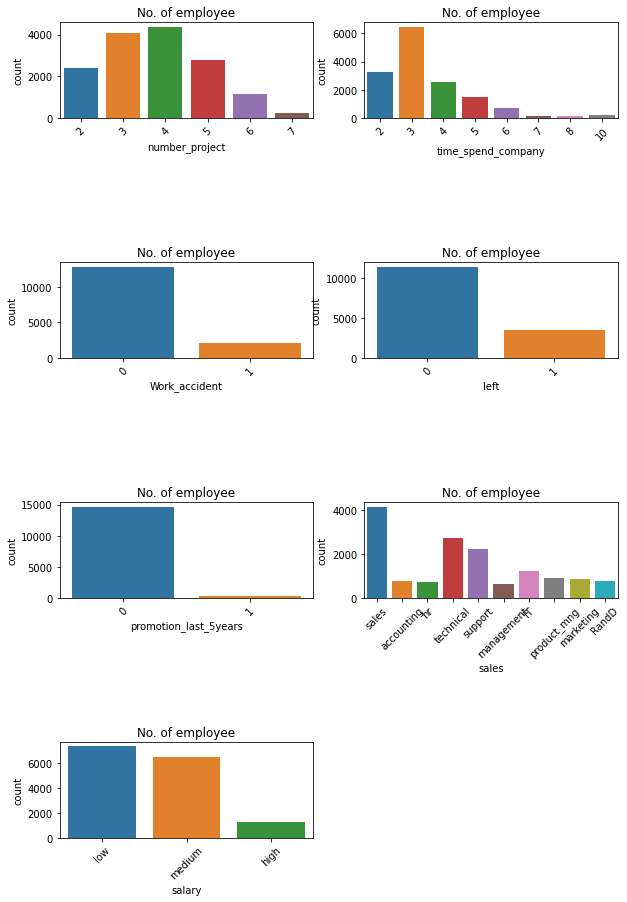

In [ ]:
fig=plt.subplots(figsize=(10,15))

for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.5)
     sns.countplot(x=j,data = data)
     plt.xticks(rotation=45)
     plt.title("No. of employee")

We can make the following conclusions:


*   Most of the employee is doing the project from 3–5.
*   There is a huge drop between 3 years and 4 years of experienced employees.
*   The no of employees left is 23% of the total employment.
*   A very less number of employees get the promotion in the last 5 years.
*   The sales department is having a maximum no.of employee followed by technical and support
*   Most of the employees are getting a salary either medium or low.

Now lets do some data preprocessing

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() # Creating labelEncoder

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

Let's split the data

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data.drop(['left'], axis=1)
y = data['left']

# Scaling features
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training and 20% test

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    activation='logistic',
                    solver='sgd',
                    verbose=True,
                    max_iter=250,
                    validation_fraction=0.2,
                    learning_rate_init=0.01)

Parameters:

*  hidden_layer_sizes: It is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.
*  activation: Activation function for the hidden layer.
*  solver: optimization algorthm.
*  learning_rate_init: It is used to control the step-size in updating the weights. 
*  validation_fraction: The proportion of training data to set aside as validation set. 
*  verbose: It is used to print progress messages to standard output.

In [ ]:
# Fit data onto the model
clf.fit(X_train,y_train)

In [ ]:
# Make prediction on test dataset
ypred=clf.predict(X_test)

In [ ]:
# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.9456666666666667

## Let's model the network using KERAS instead of MLPClassifier.

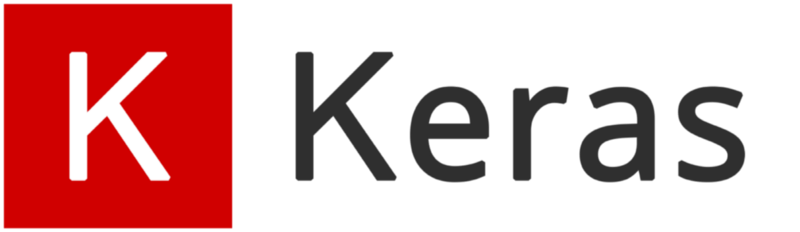

# Keras Components

*  Sequential Model: Keras provide an easy way to create multi-layer perception using the Sequential model. 
*  Add Layer: add() function is used to add a layer to the neural network. We need to pass the type of layer we want to add to the sequential model.
*  Dense Layer: It is a fully connected layer of neurons. It takes a number of nodes, activation function, and input_shape as the input parameters.
*  Model Compilation: It is used to compile the model. It takes optimizer and loss function as the input parameters.
*  Model Training: the fit() function used to train the model. It takes the following parameters as input: training data, validation data, and the number of epochs.
*  Make Predictions: the predict() function is used to make predictions on new input data. 
*  Model Evaluation: the evaluate() function is used to assess the model performance. it takes test features and labels as input.

Now lets create a simple neural network in Keras for the above discussed problem

In [ ]:
import numpy as np
import pandas as pd

# Load data
data=pd.read_csv('HR_comma_sep.csv')

data.head()

Machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column’s value can be represented as low:0, medium:1, and high:2. This process is known as label encoding. In sklearn, we can do this using LabelEncoder.

In [2]:
# Import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])

X = data.drop(['left'], axis=1)
y = data['left']

# Convert dataframes into numpy array
X = X.values
y = y.values

# Scaling features
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [4]:
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()

# Input layers
model.add(Dense(6, input_dim=9, activation='relu'))

# hidden layers
model.add(Dense(4, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score) #loss and accuracy

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

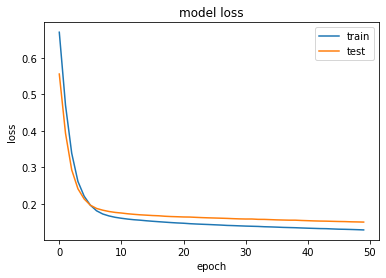

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()